In [1]:
from scipy.io import arff
import pandas as pd
import mne
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the ARFF file
data, meta = arff.loadarff('EEG Eye State.arff')  # Replace 'your_data.arff' with the path to your ARFF file

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


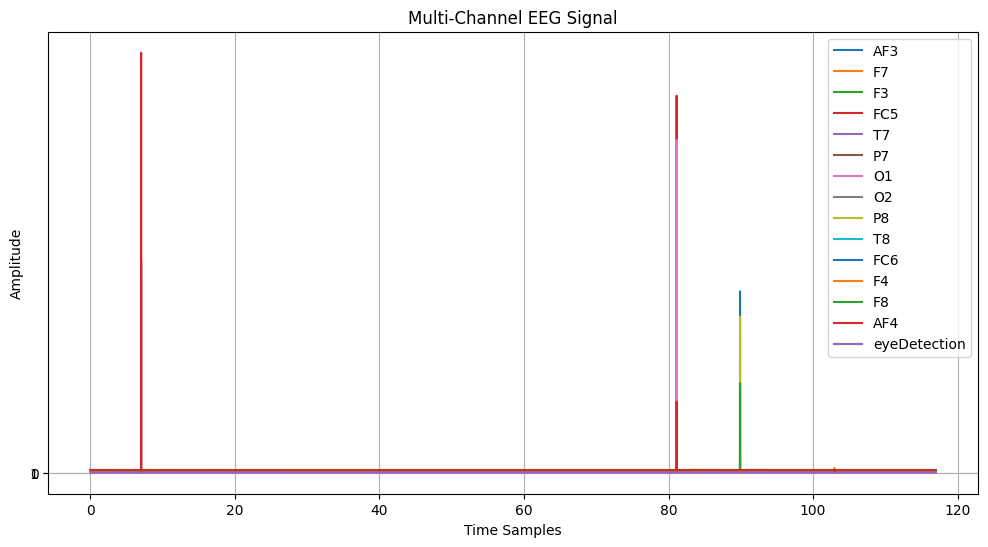

In [3]:
time_samples = np.linspace(0,117, int(df.shape[0]),endpoint=False)
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
for channel in df.columns:
    plt.plot(time_samples, df[channel], label=channel)

plt.xlabel('Time Samples')
plt.ylabel('Amplitude')
plt.title('Multi-Channel EEG Signal')
plt.legend()  # Add a legend to label the channels
plt.grid(True)
plt.show()


Convert eyeDetection type from byte to int

In [4]:
eyeDetection = []
for i in range(len(df["eyeDetection"])):
    a = df["eyeDetection"][i]
    str_data = a.decode('utf-8')
    eyeDetection.append(int(str_data))
df["eyeDetection"] = eyeDetection

In [5]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [6]:
# Extract EEG data and transpose it if necessary
eeg_data = df.values.T  # Transpose if the channels are in rows

# Create MNE info object
ch_names = df.columns.tolist()

sfreq = df.shape[0] / 117  # Sampling frequency in Hz. 117 is the duration of the experiment (in sec)
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

# Create RawArray
raw = mne.io.RawArray(eeg_data, info)

Creating RawArray with float64 data, n_channels=15, n_times=14980
    Range : 0 ... 14979 =      0.000 ...   116.992 secs
Ready.


In [7]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4, ...
 chs: 15 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 15
 projs: []
 sfreq: 128.0 Hz
>

In [8]:
from mne.preprocessing import ICA

# Create an ICA object
ica = ICA(n_components=15, random_state=97)

# Fit ICA to the raw EEG data
ica.fit(raw)
raw = ica.apply(raw)
data = raw.to_data_frame()

Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 15 components


C:\Users\Omer\AppData\Local\Temp\ipykernel_13308\1265737987.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 15 PCA components


C:\Users\Omer\AppData\Local\Temp\ipykernel_13308\1265737987.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.5) and smallest (2.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 12
  ica.fit(raw)


In [9]:
data["eyeDetection"] = df["eyeDetection"]
data["eyeDetection"]

0        0
1        0
2        0
3        0
4        0
        ..
14975    1
14976    1
14977    1
14978    1
14979    1
Name: eyeDetection, Length: 14980, dtype: int64

In [10]:
def remove_outliers_iqr(data, iqr_multiplier=1.5):
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)].reset_index(drop=True)

    # filtered_entries = (data[column] >= lower_bound) & (data[column] <= upper_bound)
    # filtered_df = data[filtered_entries].reset_index(drop=True)
        
    return data

In [11]:
filtered_df = remove_outliers_iqr(data)

filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10848 entries, 0 to 10847
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          10848 non-null  float64
 1   AF3           10848 non-null  float64
 2   F7            10848 non-null  float64
 3   F3            10848 non-null  float64
 4   FC5           10848 non-null  float64
 5   T7            10848 non-null  float64
 6   P7            10848 non-null  float64
 7   O1            10848 non-null  float64
 8   O2            10848 non-null  float64
 9   P8            10848 non-null  float64
 10  T8            10848 non-null  float64
 11  FC6           10848 non-null  float64
 12  F4            10848 non-null  float64
 13  F8            10848 non-null  float64
 14  AF4           10848 non-null  float64
 15  eyeDetection  10848 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 1.3 MB


In [12]:
filtered_df_to_plot = filtered_df.drop(["eyeDetection", "time"], axis=1)

time_samples = np.linspace(0,117, int(filtered_df_to_plot.shape[0]),endpoint=False)

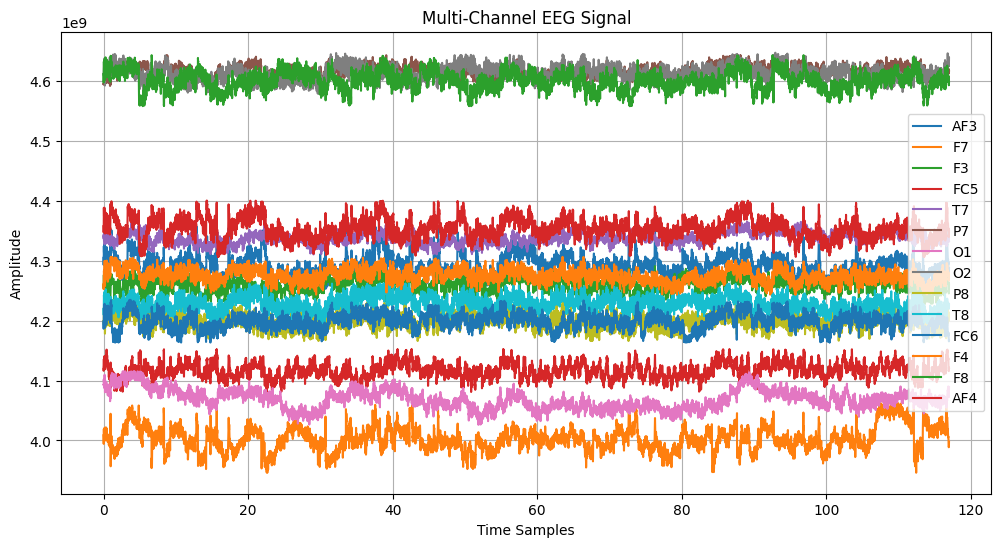

In [13]:
def plot_df():
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    for channel in filtered_df_to_plot.columns:
        plt.plot(time_samples, filtered_df_to_plot[channel], label=channel)

    plt.xlabel('Time Samples')
    plt.ylabel('Amplitude')
    plt.title('Multi-Channel EEG Signal')
    plt.legend()  # Add a legend to label the channels
    plt.grid(True)
    plt.show()
plot_df()

# Model

In [14]:
y = filtered_df["eyeDetection"]
X = filtered_df.drop("eyeDetection", axis=1)

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y_actual = y
X = X.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=0.2, random_state=20)

# Train your machine learning model
model = RandomForestClassifier(n_estimators=117, random_state=20)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.03%


-------

In [16]:
output_pairs_list = [[y_test.index[i], y_pred[i]] for i in range(len(y_test))]
output_pairs_list

[[3555, 1],
 [8298, 1],
 [8495, 1],
 [8377, 1],
 [5521, 1],
 [784, 0],
 [4330, 0],
 [9814, 0],
 [2522, 1],
 [2274, 1],
 [617, 1],
 [1388, 1],
 [3689, 1],
 [10327, 0],
 [5939, 1],
 [3986, 0],
 [2491, 1],
 [10695, 0],
 [5795, 1],
 [10430, 0],
 [5064, 1],
 [2323, 1],
 [8858, 0],
 [1274, 1],
 [1020, 0],
 [6087, 1],
 [460, 1],
 [10208, 0],
 [2589, 1],
 [4015, 0],
 [2080, 1],
 [2950, 0],
 [6556, 1],
 [3349, 0],
 [2608, 1],
 [3785, 1],
 [2371, 1],
 [5259, 1],
 [6685, 1],
 [4022, 0],
 [1304, 1],
 [7844, 0],
 [2663, 1],
 [62, 0],
 [5123, 1],
 [3877, 1],
 [8596, 0],
 [4157, 0],
 [537, 0],
 [7085, 0],
 [9410, 0],
 [8618, 0],
 [2805, 1],
 [5385, 1],
 [8713, 0],
 [1239, 1],
 [7910, 0],
 [8373, 1],
 [904, 0],
 [6827, 0],
 [5929, 1],
 [1279, 1],
 [8479, 1],
 [49, 0],
 [9346, 0],
 [6094, 1],
 [3354, 0],
 [8525, 1],
 [5894, 1],
 [9441, 0],
 [3347, 0],
 [9965, 0],
 [9285, 0],
 [4226, 0],
 [9322, 0],
 [8034, 0],
 [2634, 1],
 [10023, 0],
 [9192, 0],
 [10439, 0],
 [8659, 0],
 [8144, 1],
 [8894, 0],
 [6493,

In [17]:
classification_list = [y_pred[i] for i in range(len(y_test))]
classification_list

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,


In [18]:
true_false_list = []
for i in classification_list:
  if i == 1:
    true_false_list.append("True")
  elif i == 0:
    true_false_list.append("False")

true_false_list

['True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'F

In [19]:
file = open("output.txt", "a")
file.write(str(true_false_list))
file.close()